**Import all the librairies and functions**

In [4]:
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal
from scipy.signal import butter, filtfilt, freqz
import openpyxl
from openpyxl import Workbook, load_workbook
import xlrd
#MNE
import mne
from mne.time_frequency import tfr_morlet
from importlib import reload 
from os.path import join, dirname, realpath, exists

#load poly5reader
# define current working directory (the one that contains this notebook): this is the project_path
os.chdir('c:\\Users\\Juliette\\Research\\Projects\\Synchronization project\\Code\\Synchronization')
project_path = os.getcwd()

# change temporarily the working directory to go fetch the poly5 reader: this is the code_path
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'tmsi-python-interface-main'))
code_path = os.getcwd()

print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch Poly5 reader:{code_path}')

#fetch the poly5 reader
from TMSiFileFormats.file_readers import Poly5Reader

# set the working directory back to the project_path
os.chdir(project_path)

# load pyPerceive functions
os.chdir('c:\\Users\\Juliette\\Research\\Projects\\Synchronization project\\Code\\Synchronization')
project_path = os.getcwd()
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.join(os.getcwd(), 'PyPerceive'))
os.chdir(os.path.join(os.getcwd(), 'code'))
code_path = os.getcwd()
print (f'working dir for analysis:{project_path}')
print (f'working dir to go fetch PyPerceive functions:{code_path}')

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

#reset the proper working directory for the analysis
os.chdir(project_path)

working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch Poly5 reader:c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main
working dir for analysis:c:\Users\Juliette\Research\Projects\Synchronization project\Code\Synchronization
working dir to go fetch PyPerceive functions:c:\Users\Juliette\Research\Projects\Synchronization project\Code\PyPerceive\code


**Open LFP data**

if PyPerceive:

In [ ]:
# define an example instance and fill in the values of the dataclass Perceivedata 
# choose the values you are interested in analyzing further

sub061 = main_class.Perceivedata(
    sub = "061", 
    incl_modalities=['survey', 'streaming'],
    incl_session = ['postop', 'fu12m', 'fu18m'],
    incl_condition =['m0s0', ],
    incl_task = ["rest"],
    incl_contact = ["RingL", "SegmInterR", "SegmIntraR"],
    import_json=False,
    warn_for_metaNaNs=True,
    # use_bids=True,  # TODO: add to functionality
)

#store the MNE object in the variable
sub061_data = sub061.streaming.postop.m0s0.rest.run1.data
#look at the MNE object
sub061_data

without pyPerceive:

Example with sub-020 23MFU M1S0 Rest:

In [5]:
savingpath = 'C:\\Users\\Juliette\\OneDrive\\Documents\\PhD\\Figures\\Sync analysis\\Sub020 23MFU M0S1'
subject_ID = 'Sub020 23 MFU M1S0 Rest'
datapath = 'C:\\Users\\Juliette\\OneDrive\\Bureau\\Recordings\\PERCEPT recordings\\sub-020\\23MFU\\MedOn\\sub-20210329PStn\\ses-2023022111165459\\ieeg'
filename = 'sub-20210329PStn_ses-2023022111165459_run-BrainSense20230221121800.mat'
LFP_file = mne.io.read_raw_fieldtrip(        
	os.path.join(datapath, filename),        
	info={}, # add info here        
	data_name='data',  # name of heading dict/ variable of original MATLAB object    
)
LFP_file.ch_names
n_chan = len(LFP_file.ch_names)
LFP_file.n_times #number of samples
LFP_file.times #timepoints set to zero
LFP_file._data # channel trials
LFP_file.info['sfreq'] # sampling frequency
time_duration_LFP = (LFP_file.n_times/LFP_file.info['sfreq']).astype(float)
time_duration_LFP_ms=time_duration_LFP*1000
time_between_samples_LFP=1000/LFP_file.info['sfreq']
print(     
	f'The data object has:\n\t{LFP_file.n_times} time samples,'      
	f'\n\tand a sample frequency of {LFP_file.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration_LFP} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{LFP_file.ch_names}.')


Creating RawArray with float64 data, n_channels=6, n_times=41375
    Range : 0 ... 41374 =      0.000 ...   165.496 secs
Ready.


c:\Users\Juliette\anaconda3\envs\mne\lib\site-packages\pymatreader\utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\661547697.py:5: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  LFP_file = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\661547697.py:5: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_02. Making it a MISC channel.
  LFP_file = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\661547697.py:5: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_02. Making it a MISC channel.
  LFP_file = mne.io.read_raw_fieldtrip(
C:\Users\Juliette\AppData\Local\Temp\ipy

The data object has:
	41375 time samples,
	and a sample frequency of 250.0 Hz
	with a recording duration of 165.5 seconds.
	6 channels were labeled as 
['LFP_Stn_L_02', 'LFP_Stn_R_02', 'LFP_Stn_L_02_PEAK14Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK14Hz_THR20-30_AVG3000ms', 'STIM_L_130Hz_60us', 'STIM_R_130Hz_60us'].


In [6]:
## set all font sizes

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

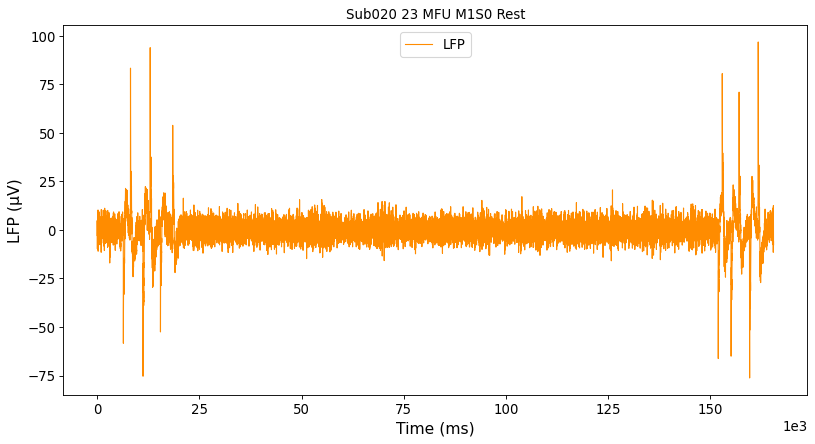

In [7]:
LFP_channel = LFP_file.get_data()[0]
LFP_timescale=np.arange(0,time_duration_LFP_ms,time_duration_LFP_ms/LFP_file.n_times)
figure(figsize=(12, 6), dpi=80)
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
plt.xlabel('Time (ms)')
plt.ylabel('LFP (µV)')
plt.title(str(subject_ID))
plt.plot(LFP_timescale,LFP_channel, linewidth=1,color='darkorange')
plt.legend(['LFP'],loc="upper center")
plt.savefig(savingpath + '\\LFP raw plot.png',bbox_inches='tight')


Loop to detect all start-times and end-times, compile those values in a list

Take the lowest/highest points from the artefact:

Change the points detected as "end" of artefact:

In [8]:
#initialize variables (lists and state)
time_artefact_start_LFP = []
time_artefact_stop_LFP = []
value_artefact_start_LFP = []
value_artefact_stop_LFP = []
state_LFP:str = "stim_OFF"
low_thresh_LFP = -50
high_thresh_LFP = 30

#start looking at each value one by one and append the timepoint to the proper list depending on the state and threshold crossed
for n in range(0,(len(LFP_channel)-1)):
    if (LFP_channel[n] <= low_thresh_LFP) and (state_LFP != "stim_ON") and (LFP_channel[n] < LFP_channel[n+1]) and (LFP_channel[n] < LFP_channel[n-1]):
        time_artefact_start_LFP.append(LFP_timescale[n])
        value_artefact_start_LFP.append(LFP_channel[n])
        state_LFP = "stim_ON"
    else:
        n = n+1
         
    if (LFP_channel[n] >= high_thresh_LFP) and (state_LFP != "stim_OFF"):
        time_artefact_stop_LFP.append(LFP_timescale[n])
        value_artefact_stop_LFP.append(LFP_channel[n])
        state_LFP = "stim_OFF"
    else:
        n = n+1
print(
    f'\n\tthe artefacts in the LFP start at: \t{time_artefact_start_LFP} ms',
    f'\n\tand end at : \t{time_artefact_stop_LFP} ms'
    )


	the artefacts in the LFP start at: 	[6412.0, 11224.0, 15488.0, 151976.0, 155116.0, 159652.0] ms 
	and end at : 	[8144.0, 12960.0, 18476.0, 152940.0, 157060.0, 161732.0] ms


Plot artefact points on raw signal to visualize them

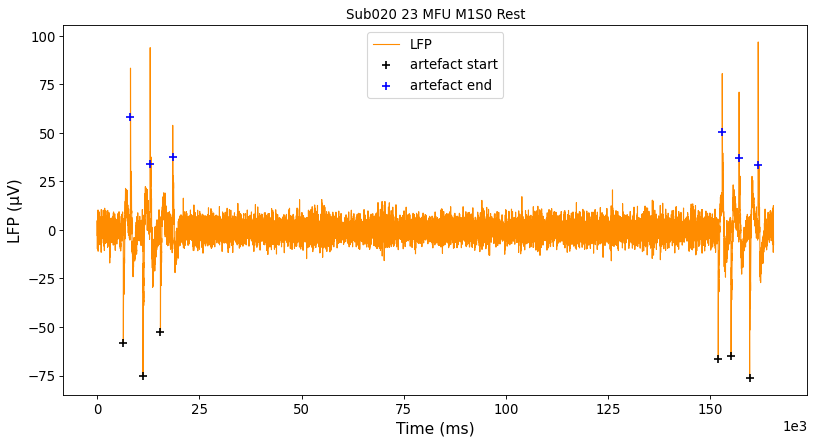

In [9]:
figure(figsize=(12, 6), dpi=80)
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
plt.xlabel('Time (ms)')
plt.ylabel('LFP (µV)')
#plt.xlim(157000,159000)
plt.title(str(subject_ID))
plt.plot(LFP_timescale,LFP_channel, linewidth=1,color='darkorange',zorder=1)
plt.scatter(time_artefact_start_LFP,value_artefact_start_LFP,color='black',s=50,marker="+",zorder=2,label='artefact start')
plt.scatter(time_artefact_stop_LFP,value_artefact_stop_LFP,color='blue',s=50,marker="+",zorder=2,label='artefact end')
plt.legend(['LFP','artefact start','artefact end'],loc="upper center")
plt.savefig(savingpath + '\\LFP raw plot with artefacts detected.png',bbox_inches='tight')


Determine duration of each artefact detected in LFP

In [10]:
artefact_duration_LFP=[]
for i in (np.arange(0,(len(time_artefact_start_LFP)),1)):
        artefact_duration_LFP.append(time_artefact_stop_LFP[i]-time_artefact_start_LFP[i])

artefact_duration_LFP

[1732.0, 1736.0, 2988.0, 964.0, 1944.0, 2080.0]

**Open sensor-data**

In [11]:
TMSi_data = Poly5Reader()

# Extract the samples and channel names from the Poly5Reader object
samples = TMSi_data.samples
ch_names = TMSi_data.ch_names

# Conversion to MNE raw array

toMNE = True
TMSi_file = TMSi_data.read_data_MNE()

# Retrieve the MNE RawArray info and sample data
info_mne = TMSi_file.info
samples_mne = TMSi_file._data
    
#TMSi_file.plot(start = 5, duration = 5, n_channels = 2) #(only if I want to plot in interactive viewer)

n_chan = len(TMSi_file.ch_names)
time_duration_TMSi = (TMSi_file.n_times/TMSi_file.info['sfreq']).astype(float)
time_duration_TMSi_ms=time_duration_TMSi*1000
time_between_samples_TMSi=1000/TMSi_file.info['sfreq']

print(     
	f'The data object has:\n\t{TMSi_file.n_times} time samples,'      
	f'\n\tand a sample frequency of {TMSi_file.info["sfreq"]} Hz'      
	f'\n\twith a recording duration of {time_duration_TMSi} seconds.'      
	f'\n\t{n_chan} channels were labeled as \n{TMSi_file.ch_names}.')

TMSi_timescale=np.arange(0,time_duration_TMSi_ms,time_duration_TMSi_ms/TMSi_file.n_times)


Reading file  C:/Users/Juliette/OneDrive/Bureau/Recordings/TMSi recordings/sub-020/23MFU/sub_020_23mfu_M1S0_BrStr_Rest - 20230221T130904/sub_020_23mfu_M1S0_BrStr_Rest-20230221T130904.DATA.Poly5
	 Number of samples:  748396 
	 Number of channels:  14 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=14, n_times=748396
    Range : 0 ... 748395 =      0.000 ...   187.099 secs
Ready.
The data object has:
	748396 time samples,
	and a sample frequency of 4000.0 Hz
	with a recording duration of 187.099 seconds.
	14 channels were labeled as 
['BIP 01', 'BIP 02', 'BIP 03', 'X-0', 'Y-0', 'Z-0', 'X-1', 'Y-1', 'Z-1', 'X-AXIS', 'Y-AXIS', 'Z-AXIS', 'STATUS', 'Counter 2power24'].


c:\Users\Juliette\Research\Projects\Synchronization project\Code\tmsi-python-interface-main\TMSiFileFormats\file_readers\poly5reader.py:92: RuntimeWarning: Channel names are not unique, found duplicates for: {'Y', 'Z', 'X'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


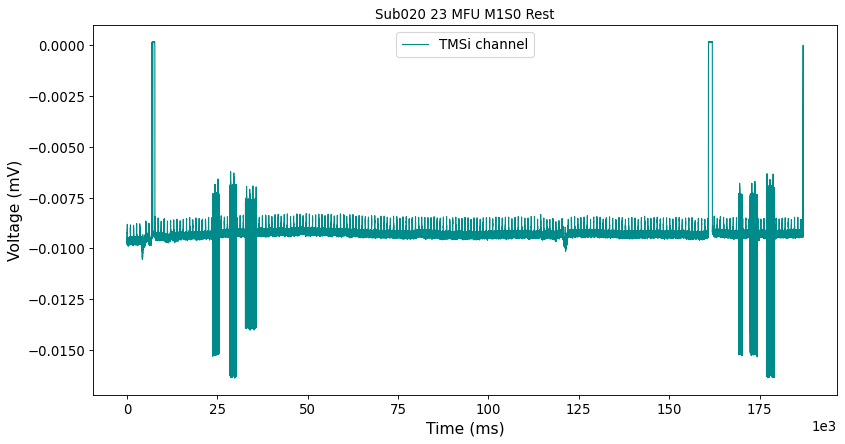

In [12]:
TMSi_channel = TMSi_file.get_data()[0]
figure(figsize=(12, 6), dpi=80)
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title(str(subject_ID))
plt.plot(TMSi_timescale,TMSi_channel,linewidth=1,color='darkcyan')
plt.legend(['TMSi channel'],loc="upper center")
plt.savefig(savingpath + '\\TMSi channel BIP01 raw plot.png',bbox_inches='tight')



Detect artefacts in TMSi channel:

In [13]:
#initialize variables (lists and state)
time_artefact_start_TMSi = []
time_artefact_stop_TMSi = []
value_artefact_start_TMSi =[]
value_artefact_stop_TMSi = []
stimON = False
thresh_TMSi = -0.0125


#start looking at each value one by one and append the timepoint to the list depending on the state and thresh_TMSiold crossed
for q in range(0,(len(TMSi_channel)-1)):
    if (stimON == False) and (TMSi_channel[q] <= thresh_TMSi) and (TMSi_channel[q] < TMSi_channel[q+1]) and (TMSi_channel[q] < TMSi_channel[q-1]):
        time_artefact_start_TMSi.append(TMSi_timescale[q])
        value_artefact_start_TMSi.append(TMSi_channel[q])
        stimON = True
        q = q+1
    if (stimON == True) and (TMSi_channel[q] <= thresh_TMSi) and (TMSi_channel[q] < TMSi_channel[q+1]) and (TMSi_channel[q] < TMSi_channel[q-1]):
        if (all(TMSi_channel[(q+3):(q+100)] > thresh_TMSi)):
            time_artefact_stop_TMSi.append(TMSi_timescale[q])
            value_artefact_stop_TMSi.append(TMSi_channel[q])
            stimON = False
            q = q+1
        else:
            q = q+1
    else:
        q = q+1


print(
    f'\n\tthe artefacts in the TMSi start at: \t{time_artefact_start_TMSi} ms'
    f'\n\tand end at : \t{time_artefact_stop_TMSi} ms'
    )




	the artefacts in the TMSi start at: 	[23713.5, 28526.0, 32784.25, 169279.75, 172421.25, 176956.75] ms
	and end at : 	[25446.0, 30266.25, 35779.75, 170250.0, 174369.5, 179043.5] ms


Plot artefacts on raw signal to visualize them:

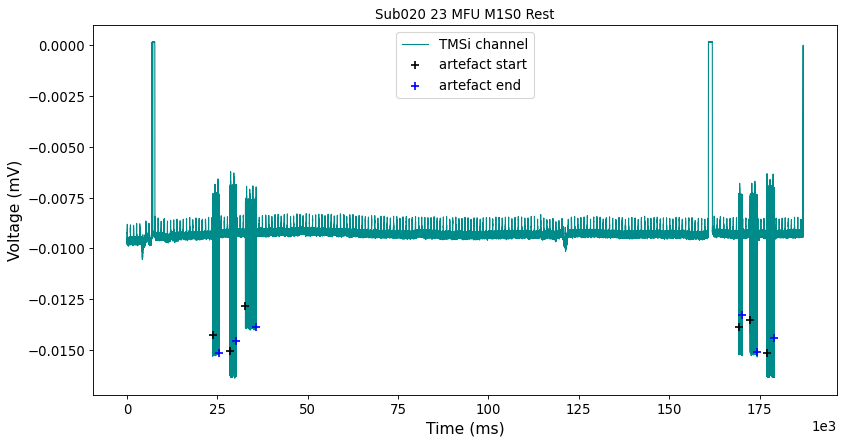

In [14]:
figure(figsize=(12, 6), dpi=80)
plt.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title(str(subject_ID))
plt.plot(TMSi_timescale,TMSi_channel, linewidth=1,color='darkcyan',zorder=1)
plt.scatter(time_artefact_start_TMSi,value_artefact_start_TMSi,color='black',s=50,marker="+",zorder=2,label='artefact start')
plt.scatter(time_artefact_stop_TMSi,value_artefact_stop_TMSi,color='blue',s=50,marker="+",zorder=2,label='artefact end')
plt.legend(['TMSi channel','artefact start','artefact end'],loc="upper center")
plt.savefig(savingpath + '\\TMSi raw plot with artefacts detected.png',bbox_inches='tight')

Determine duration of each artefact detected

In [15]:
artefact_duration_LFP=[]
for i in (np.arange(0,(len(time_artefact_start_LFP)),1)):
        artefact_duration_LFP.append(time_artefact_stop_LFP[i]-time_artefact_start_LFP[i])

artefact_duration_LFP


artefact_duration_TMSi=[]

for i in (np.arange(0,len(time_artefact_start_TMSi),1)):
        artefact_duration_TMSi.append(time_artefact_stop_TMSi[i]-time_artefact_start_TMSi[i])

print(     
	f'The artefacts in the LFP last \t{artefact_duration_LFP} ms,'      
	f'\n\tand the artefacts in the TMSi datas last {artefact_duration_TMSi} ms')


The artefacts in the LFP last 	[1732.0, 1736.0, 2988.0, 964.0, 1944.0, 2080.0] ms,
	and the artefacts in the TMSi datas last [1732.5, 1740.25, 2995.5, 970.25, 1948.25, 2086.75] ms


Calculate difference between LFP and TMSi:

In [16]:
diff_duration=[]
for i in (np.arange(0,len(artefact_duration_LFP),1)):
    diff_duration.append(artefact_duration_LFP[i]-artefact_duration_TMSi[i])
diff_duration

[-0.5, -4.25, -7.5, -6.25, -4.25, -6.75]

Calculate delay between 2 artefacts in each recording:

In [17]:
delay_between_artefacts_LFP = []
delay_between_artefacts_TMSi = []
for i in (np.arange(0,len(time_artefact_start_LFP)-1,1)):
    delay_between_artefacts_LFP.append(time_artefact_start_LFP[i+1]-time_artefact_start_LFP[i])
    delay_between_artefacts_TMSi.append(time_artefact_start_TMSi[i+1]-time_artefact_start_TMSi[i])

print(     
	f'The delays between artefacts in the LFP are \t{delay_between_artefacts_LFP} ms,'      
	f'\n\tand the delays between artefacts in the TMSi are {delay_between_artefacts_TMSi} ms')


The delays between artefacts in the LFP are 	[4812.0, 4264.0, 136488.0, 3140.0, 4536.0] ms,
	and the delays between artefacts in the TMSi are [4812.5, 4258.25, 136495.5, 3141.5, 4535.5] ms


In [18]:
diff_delay = []
for i in (np.arange(0,len(delay_between_artefacts_LFP),1)):
    diff_delay.append(delay_between_artefacts_LFP[i]-delay_between_artefacts_TMSi[i])
diff_delay

[-0.5, 5.75, -7.5, -1.5, 0.5]

**Align based on first artefact**

Construct 2 dataframes to offset each recording based on first artefact detection and plot with same scale

In [19]:
df_LFP = pd.DataFrame({'time (ms)': LFP_timescale, 'LFP (µV)': LFP_channel})
df_TMSi = pd.DataFrame({'time (ms)': TMSi_timescale, 'Voltage (mV)': TMSi_channel})

# find index for each artefact start
start_LFP = df_LFP[df_LFP['time (ms)'] == (time_artefact_start_LFP[0])].index[0]
start_TMSi = df_TMSi[df_TMSi['time (ms)'] == (time_artefact_start_TMSi[0])].index[0]

#crop each dataframe at first index
df_LFP_offset = df_LFP.truncate(before = start_LFP)
df_TMSi_offset = df_TMSi.truncate(before = start_TMSi)

#transfer to arrays
TMSi_timescale_offset = df_TMSi_offset['time (ms)'].to_numpy()
TMSi_channel_offset = df_TMSi_offset['Voltage (mV)'].to_numpy()
LFP_timescale_offset = df_LFP_offset['time (ms)'].to_numpy()
LFP_channel_offset = df_LFP_offset['LFP (µV)'].to_numpy()

#generate new timescales starting at 0
TMSi_timescale_offset_2 = np.arange(0,(time_duration_TMSi_ms-time_artefact_start_TMSi[0]),time_between_samples_TMSi)
LFP_timescale_offset_2 = np.arange(0,(time_duration_LFP_ms-time_artefact_start_LFP[0]),time_between_samples_LFP)

Detect artefacts in these aligned recordings and check delay

In [20]:
##start with LFP:##

#initialize variables (lists and state)
time_artefact_start_LFP_offset = []
time_artefact_stop_LFP_offset = []
value_artefact_start_LFP_offset = []
value_artefact_stop_LFP_offset = []
state_LFP:str = "stim_ON"
low_thresh_LFP = -50
high_thresh_LFP = 30

#start looking at each value one by one and append the timepoint to the proper list depending on the state and threshold crossed
for n in range(0,(len(LFP_channel_offset)-1)):
    if (LFP_channel_offset[n] <= low_thresh_LFP) and (state_LFP != "stim_ON") and (LFP_channel_offset[n] < LFP_channel_offset[n+1]) and (LFP_channel_offset[n] < LFP_channel_offset[n-1]):
        time_artefact_start_LFP_offset.append(LFP_timescale_offset_2[n])
        value_artefact_start_LFP_offset.append(LFP_channel_offset[n])
        state_LFP = "stim_ON"
    else:
        n = n+1
         
    if (LFP_channel_offset[n] >= high_thresh_LFP) and (state_LFP != "stim_OFF"):
        time_artefact_stop_LFP_offset.append(LFP_timescale_offset_2[n])
        value_artefact_stop_LFP_offset.append(LFP_channel_offset[n])
        state_LFP = "stim_OFF"
    else:
        n = n+1
print(
    f'\n\tthe artefacts in the LFP start at: \t{time_artefact_start_LFP_offset} ms',
    f'\n\tand end at : \t{time_artefact_stop_LFP_offset} ms'
)



	the artefacts in the LFP start at: 	[4812.0, 9076.0, 145564.0, 148704.0, 153240.0] ms 
	and end at : 	[1732.0, 6548.0, 12064.0, 146528.0, 150648.0, 155320.0] ms


In [21]:
## then for TMSi: ##

#initialize variables (lists and state)
time_artefact_start_TMSi_offset = []
time_artefact_stop_TMSi_offset = []
value_artefact_start_TMSi_offset =[]
value_artefact_stop_TMSi_offset = []
stimON = True
thresh_TMSi = -0.0125


#start looking at each value one by one and append the timepoint to the list depending on the state and thresh_TMSiold crossed
for q in range(0,(len(TMSi_channel_offset)-1)):
    if (stimON == False) and (TMSi_channel_offset[q] <= thresh_TMSi) and (TMSi_channel_offset[q] < TMSi_channel_offset[q+1]) and (TMSi_channel_offset[q] < TMSi_channel_offset[q-1]):
        time_artefact_start_TMSi_offset.append(TMSi_timescale_offset_2[q])
        value_artefact_start_TMSi_offset.append(TMSi_channel_offset[q])
        stimON = True
        q = q+1
    if (stimON == True) and (TMSi_channel_offset[q] <= thresh_TMSi) and (TMSi_channel_offset[q] < TMSi_channel_offset[q+1]) and (TMSi_channel_offset[q] < TMSi_channel_offset[q-1]):
        if (all(TMSi_channel_offset[(q+3):(q+100)] > thresh_TMSi)):
            time_artefact_stop_TMSi_offset.append(TMSi_timescale_offset_2[q])
            value_artefact_stop_TMSi_offset.append(TMSi_channel_offset[q])
            stimON = False
            q = q+1
        else:
            q = q+1
    else:
        q = q+1


print(
    f'\n\tthe artefacts in the TMSi start at: \t{time_artefact_start_TMSi_offset} ms'
    f'\n\tand end at : \t{time_artefact_stop_TMSi_offset} ms'
    )



	the artefacts in the TMSi start at: 	[4812.5, 9070.75, 145566.25, 148707.75, 153243.25] ms
	and end at : 	[1732.5, 6552.75, 12066.25, 146536.5, 150656.0, 155330.0] ms


Plot both recordings with artefacts detected:

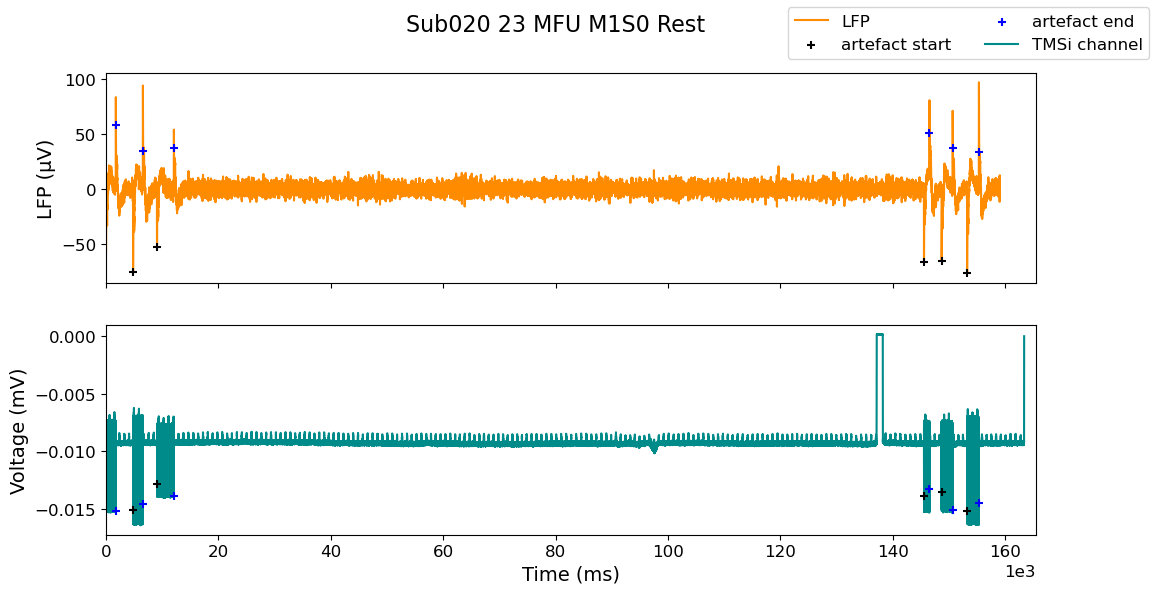

In [22]:
figB, (ax1, ax2) = plt.subplots(2,1)
figB.suptitle(str(subject_ID))
figB.set_figheight(6)
figB.set_figwidth(12)
ax1.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
ax1.axes.xaxis.set_ticklabels([])
ax2.ticklabel_format(axis='x',style='sci',scilimits=(3,3))
ax2.set_xlabel('Time (ms)')
ax1.set_ylabel('LFP (µV)')
ax2.set_ylabel('Voltage (mV)')
ax1.set_xlim(0,time_duration_LFP_ms)
ax2.set_xlim(0,time_duration_LFP_ms)
ax1.plot(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',zorder=1)
ax1.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax1.scatter(time_artefact_stop_LFP_offset,value_artefact_stop_LFP_offset,color='blue',s=30,marker="+",zorder=3)
ax2.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',zorder=1) 
ax2.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax2.scatter(time_artefact_stop_TMSi_offset,value_artefact_stop_TMSi_offset,color='blue',s=30,marker="+",zorder=3)
figB.legend(['LFP','artefact start','artefact end','TMSi channel'],ncol=2,loc="upper right")

figB.savefig(savingpath + '\\LFP and TMSi channels aligned with artefacts.png',bbox_inches='tight')

Compute time differences:

In [23]:
delay = []
for i in (np.arange(0,len(time_artefact_start_TMSi_offset))):
    delay.append(time_artefact_start_TMSi_offset[i]-time_artefact_start_LFP_offset[i])

delay

[0.5, -5.25, 2.25, 3.75, 3.25]

Plot each artefacts starts in aligned LFP and TMSi channels:

C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\789157782.py:25: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DAAC3B3C40> starts with '_'. It is thus excluded from the legend.
  fig.legend(['LFP','_','artefact start','TMSi channel','_'],loc="upper right")
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\789157782.py:25: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DAAC3E1240> starts with '_'. It is thus excluded from the legend.
  fig.legend(['LFP','_','artefact start','TMSi channel','_'],loc="upper right")
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\789157782.py:25: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DADC987DC0> starts with '_'. It is thus excluded from the legend.
  fig.legend(['LFP','_','artefact start','TMSi channel','_'],loc="upper right")
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\789157782.py:25: UserWarning: The labe

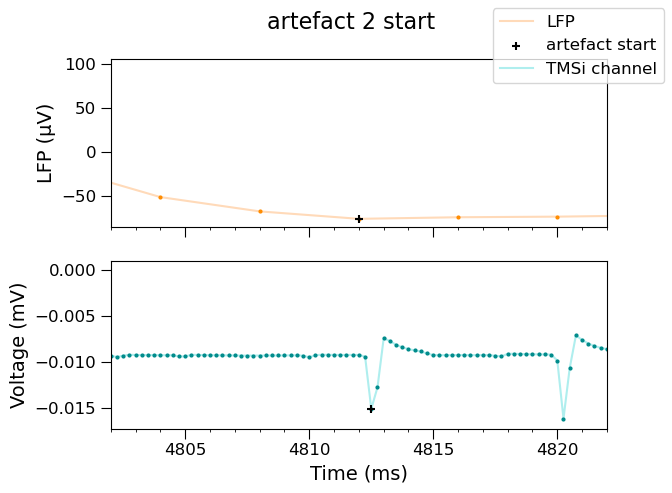

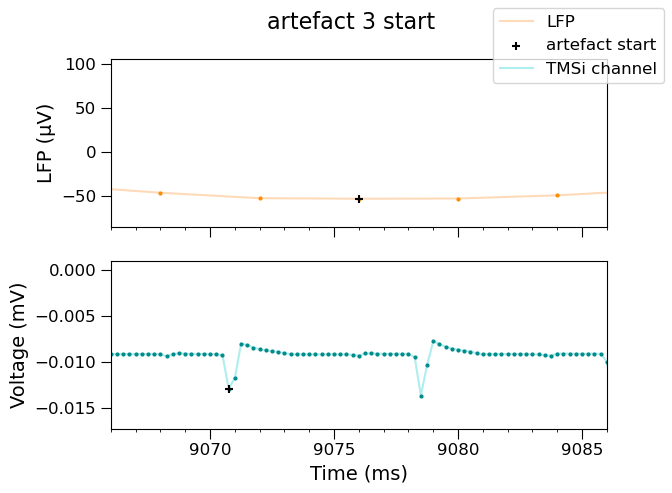

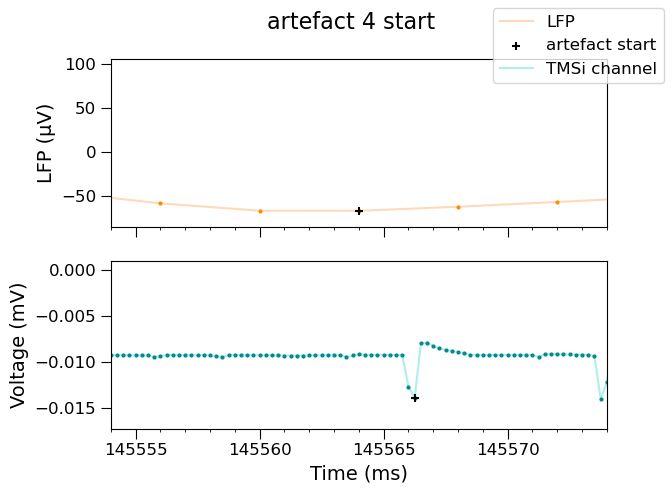

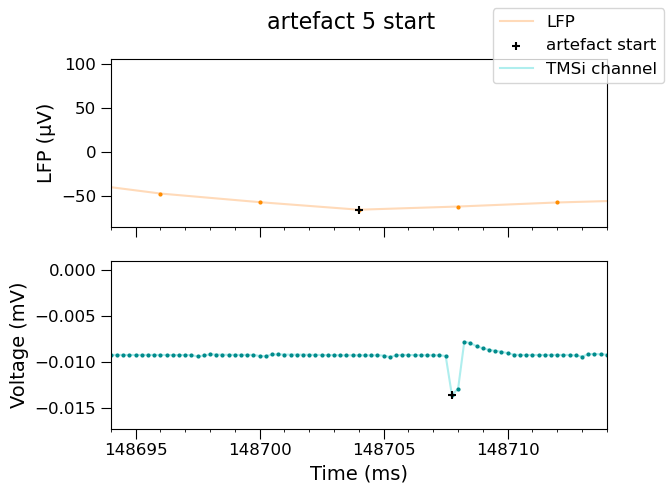

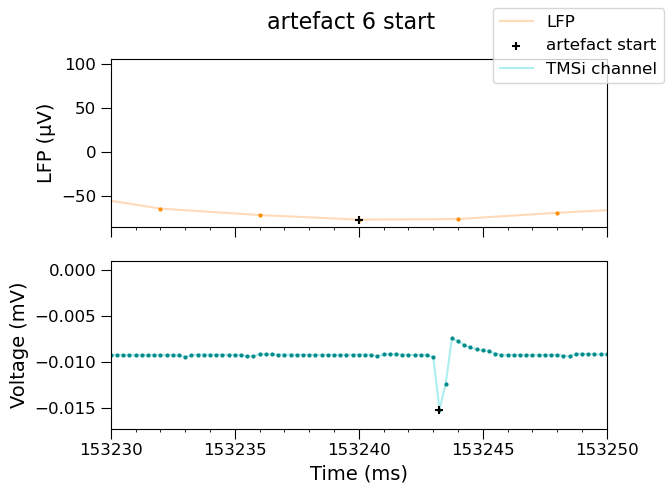

In [24]:
for i in range(0,len(time_artefact_start_LFP_offset),1):
    fig, (ax1, ax2) = plt.subplots(2,1)
    fig.suptitle('artefact ' + str(i+2) + ' start')
    ax1.tick_params(which='major', length=7)
    ax2.tick_params(which='major', length=7)
    ax1.xaxis.set_major_locator(MultipleLocator(5))
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.axes.xaxis.set_ticklabels([])
    #ax1.axes.xaxis.set_ticklabels([])
    ax2.xaxis.set_major_locator(MultipleLocator(5))
    ax2.xaxis.set_major_formatter('{x:.0f}')
    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.set_xlabel('Time (ms)')
    ax1.set_ylabel('LFP (µV)')
    ax2.set_ylabel('Voltage (mV)')
    ax1.set_xlim(int(time_artefact_start_LFP_offset[i]-10),int(time_artefact_start_LFP_offset[i]+10))
    ax2.set_xlim(int(time_artefact_start_LFP_offset[i]-10),int(time_artefact_start_LFP_offset[i]+10))
    ax1.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
    ax1.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
    ax1.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
    ax2.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
    ax2.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
    ax2.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
    
    fig.legend(['LFP','_','artefact start','TMSi channel','_'],loc="upper right")
    fig.savefig(savingpath + '\\LFP and TMSi channels aligned - artefact' + str(i+2) +'.png',bbox_inches='tight')


Plot a global figure with all the artefacts starts:

C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\3076246498.py:131: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DA8F2C4C10> starts with '_'. It is thus excluded from the legend.
  ax9.legend(['LFP','_','artefact start'],loc="upper right",bbox_to_anchor=(1.6,1),frameon=False,fontsize=MEDIUM_SIZE)
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\3076246498.py:132: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DA8F2C5750> starts with '_'. It is thus excluded from the legend.
  ax10.legend(['TMSi channel','_','_'],loc="upper right",bbox_to_anchor=(1.6,1.8),frameon=False,fontsize=MEDIUM_SIZE)
C:\Users\Juliette\AppData\Local\Temp\ipykernel_35424\3076246498.py:132: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x000001DA8F2C5B70> starts with '_'. It is thus excluded from the legend.
  ax10.legend(['TMSi channel','_','_'],loc="upper right",bbox_to_anchor=(1.6,1.8),frameo

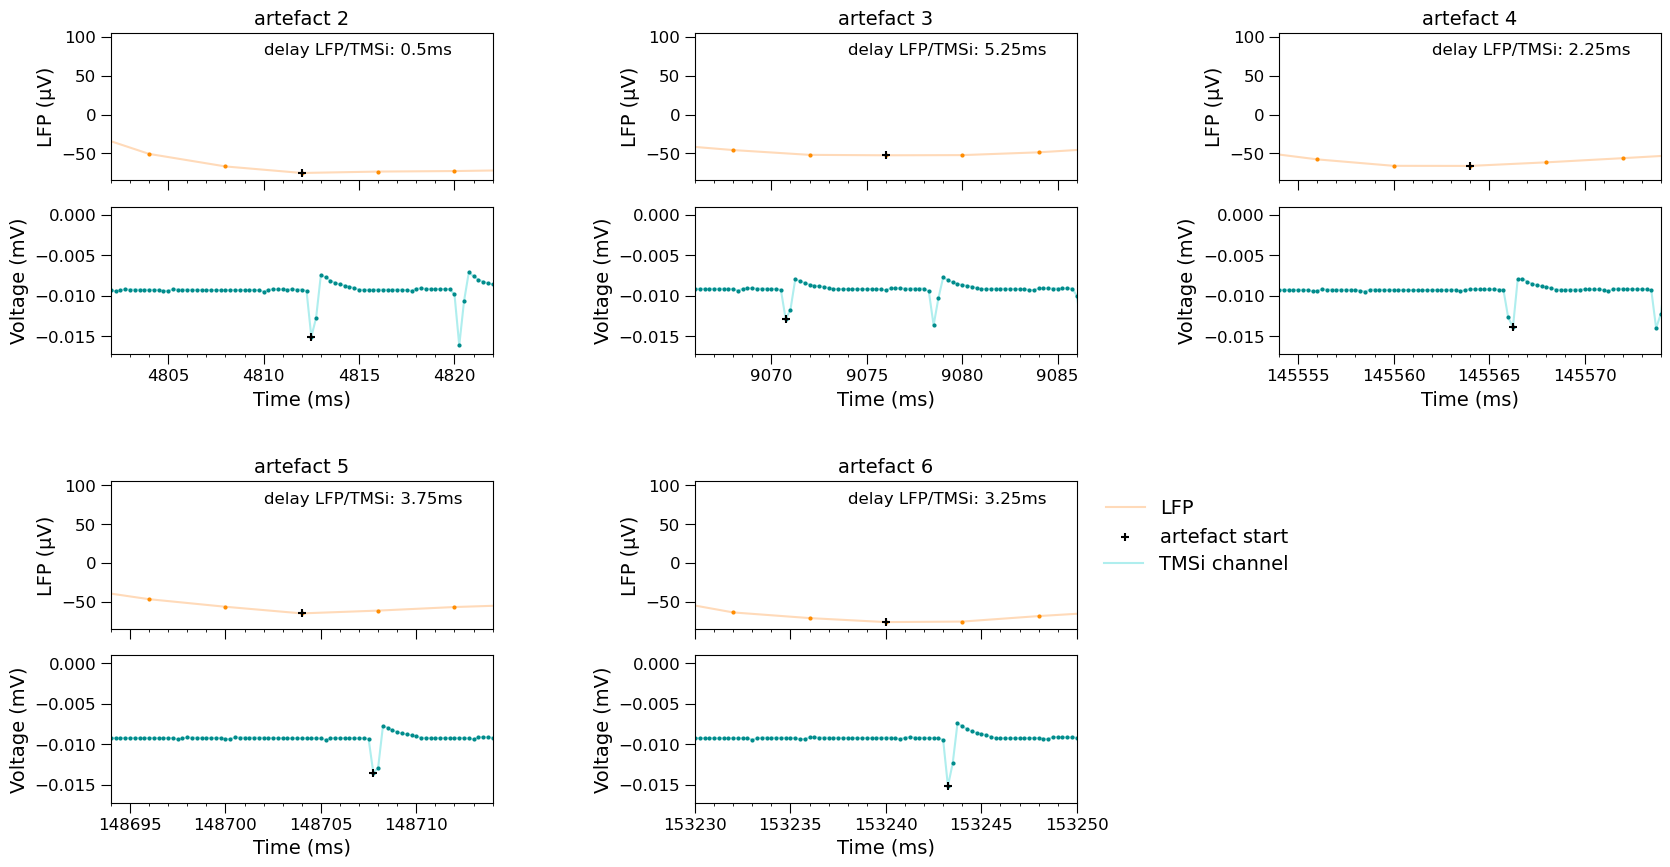

In [109]:
# Setting up the plot surface
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
gs = gridspec.GridSpec(nrows=5, ncols=5,width_ratios=[4,1,4,1,4],height_ratios=[2,2,1,2,2])

# Place axes
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[0, 4])
ax6 = fig.add_subplot(gs[1, 4])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[3, 2])
ax10 = fig.add_subplot(gs[4, 2])

#artefact 2
ax1.tick_params(which='major', length=7)
ax2.tick_params(which='major', length=7)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.axes.xaxis.set_ticklabels([])
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.xaxis.set_major_formatter('{x:.0f}')
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.set_xlabel('Time (ms)')
ax1.set_ylabel('LFP (µV)')
ax2.set_ylabel('Voltage (mV)')
ax1.set_title('artefact 2',size=MEDIUM_SIZE)
ax1.set_xlim(int(time_artefact_start_LFP_offset[0]-10),int(time_artefact_start_LFP_offset[0]+10))
ax2.set_xlim(int(time_artefact_start_LFP_offset[0]-10),int(time_artefact_start_LFP_offset[0]+10))
ax1.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
ax1.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
ax1.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax2.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
ax2.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
ax2.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax1.text(0.4,0.85,s='delay LFP/TMSi: ' +str(abs(time_artefact_start_LFP_offset[0]-time_artefact_start_TMSi_offset[0]))+ 'ms',transform=ax1.transAxes)

#artefact 3
ax3.tick_params(which='major', length=7)
ax4.tick_params(which='major', length=7)
ax3.xaxis.set_major_locator(MultipleLocator(5))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.axes.xaxis.set_ticklabels([])
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_major_formatter('{x:.0f}')
ax4.xaxis.set_minor_locator(MultipleLocator(1))
ax4.set_xlabel('Time (ms)')
ax3.set_ylabel('LFP (µV)')
ax4.set_ylabel('Voltage (mV)')
ax3.set_title('artefact 3',size=MEDIUM_SIZE)
ax3.set_xlim(int(time_artefact_start_LFP_offset[1]-10),int(time_artefact_start_LFP_offset[1]+10))
ax4.set_xlim(int(time_artefact_start_LFP_offset[1]-10),int(time_artefact_start_LFP_offset[1]+10))
ax3.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
ax3.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
ax3.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax4.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
ax4.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
ax4.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax3.text(0.4,0.85,s='delay LFP/TMSi: ' +str(abs(time_artefact_start_LFP_offset[1]-time_artefact_start_TMSi_offset[1]))+ 'ms',transform=ax3.transAxes)

#artefact 4
ax5.tick_params(which='major', length=7)
ax6.tick_params(which='major', length=7)
ax5.xaxis.set_major_locator(MultipleLocator(5))
ax5.xaxis.set_minor_locator(MultipleLocator(1))
ax5.axes.xaxis.set_ticklabels([])
ax6.xaxis.set_major_locator(MultipleLocator(5))
ax6.xaxis.set_major_formatter('{x:.0f}')
ax6.xaxis.set_minor_locator(MultipleLocator(1))
ax6.set_xlabel('Time (ms)')
ax5.set_ylabel('LFP (µV)')
ax6.set_ylabel('Voltage (mV)')
ax5.set_title('artefact 4',size=MEDIUM_SIZE)
ax5.set_xlim(int(time_artefact_start_LFP_offset[2]-10),int(time_artefact_start_LFP_offset[2]+10))
ax6.set_xlim(int(time_artefact_start_LFP_offset[2]-10),int(time_artefact_start_LFP_offset[2]+10))
ax5.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
ax5.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
ax5.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax6.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
ax6.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
ax6.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax5.text(0.4,0.85,s='delay LFP/TMSi: ' +str(abs(time_artefact_start_LFP_offset[2]-time_artefact_start_TMSi_offset[2]))+ 'ms',transform=ax5.transAxes)

#artefact 5
ax7.tick_params(which='major', length=7)
ax8.tick_params(which='major', length=7)
ax7.xaxis.set_major_locator(MultipleLocator(5))
ax7.xaxis.set_minor_locator(MultipleLocator(1))
ax7.axes.xaxis.set_ticklabels([])
ax8.xaxis.set_major_locator(MultipleLocator(5))
ax8.xaxis.set_major_formatter('{x:.0f}')
ax8.xaxis.set_minor_locator(MultipleLocator(1))
ax8.set_xlabel('Time (ms)')
ax7.set_ylabel('LFP (µV)')
ax8.set_ylabel('Voltage (mV)')
ax7.set_title('artefact 5',size=MEDIUM_SIZE)
ax7.set_xlim(int(time_artefact_start_LFP_offset[3]-10),int(time_artefact_start_LFP_offset[3]+10))
ax8.set_xlim(int(time_artefact_start_LFP_offset[3]-10),int(time_artefact_start_LFP_offset[3]+10))
ax7.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
ax7.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
ax7.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax8.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
ax8.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
ax8.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax7.text(0.4,0.85,s='delay LFP/TMSi: ' +str(abs(time_artefact_start_LFP_offset[3]-time_artefact_start_TMSi_offset[3]))+ 'ms',transform=ax7.transAxes)

#artefact 6
ax9.tick_params(which='major', length=7)
ax10.tick_params(which='major', length=7)
ax9.xaxis.set_major_locator(MultipleLocator(5))
ax9.xaxis.set_minor_locator(MultipleLocator(1))
ax9.axes.xaxis.set_ticklabels([])
ax10.xaxis.set_major_locator(MultipleLocator(5))
ax10.xaxis.set_major_formatter('{x:.0f}')
ax10.xaxis.set_minor_locator(MultipleLocator(1))
ax10.set_xlabel('Time (ms)')
ax9.set_ylabel('LFP (µV)')
ax10.set_ylabel('Voltage (mV)')
ax9.set_title('artefact 6',size=MEDIUM_SIZE)
ax9.set_xlim(int(time_artefact_start_LFP_offset[4]-10),int(time_artefact_start_LFP_offset[4]+10))
ax10.set_xlim(int(time_artefact_start_LFP_offset[4]-10),int(time_artefact_start_LFP_offset[4]+10))
ax9.plot(LFP_timescale_offset_2,LFP_channel_offset,color='peachpuff',zorder=1)
ax9.scatter(LFP_timescale_offset_2,LFP_channel_offset,color='darkorange',s=4,zorder=2) 
ax9.scatter(time_artefact_start_LFP_offset,value_artefact_start_LFP_offset,color='black',s=30,marker="+",zorder=3)
ax10.plot(TMSi_timescale_offset_2,TMSi_channel_offset, color='paleturquoise',zorder=1) 
ax10.scatter(TMSi_timescale_offset_2,TMSi_channel_offset, color='darkcyan',s=4,zorder=2)
ax10.scatter(time_artefact_start_TMSi_offset,value_artefact_start_TMSi_offset,color='black',s=30,marker="+",zorder=3)
ax9.legend(['LFP','_','artefact start'],loc="upper right",bbox_to_anchor=(1.6,1),frameon=False,fontsize=MEDIUM_SIZE)
ax10.legend(['TMSi channel','_','_'],loc="upper right",bbox_to_anchor=(1.6,1.8),frameon=False,fontsize=MEDIUM_SIZE)
ax9.text(0.4,0.85,s='delay LFP/TMSi: ' +str(abs(time_artefact_start_LFP_offset[4]-time_artefact_start_TMSi_offset[4]))+ 'ms',transform=ax9.transAxes)

plt.savefig(savingpath + '\\LFP and TMSi channels aligned - artefacts 2 to 6.png',bbox_inches='tight')